In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import re
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 13,6

Задание №1 Загрузите файл HR.csv в pandas dataframe

In [3]:
data = pd.read_csv('HR.csv')
data_new = data[data.columns[0:8]] 
data_new
#Выделяю отдельную таблицу только с численными значениями для подсчета численных характеристик

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


Задание №2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
#Специально не использую describe, чтобы создать отдельный dataframe
data_min = {}
data_max = {}
data_mean = {}
data_median = {}
data_mode = {}
data_std ={}
for key, value in data_new.items():
    data_mean[key] = round(value.mean(), 2)
    data_median[key] = value.median()
    data_mode[key] = value.mode()[0]
    data_min[key] = value.min()
    data_max[key] = value.max()
    data_std[key] = round(value.std(), 2)    
frame = {'Mean': data_mean, 'Median': data_median, 'Mode': data_mode, 'Min': data_min, 'Max': data_max, 'STD': data_std}
pd.DataFrame(frame)

,Mean,Median,Mode,Min,Max,STD
satisfaction_level,0.61,0.64,0.10,0.09,1.0,0.25
last_evaluation,0.72,0.72,0.55,0.36,1.0,0.17
number_project,3.80,4.00,4.00,2.00,7.0,1.23
average_montly_hours,201.05,200.00,135.00,96.00,310.0,49.94
time_spend_company,3.50,3.00,3.00,2.00,10.0,1.46
Work_accident,0.14,0.00,0.00,0.00,1.0,0.35
left,0.24,0.00,0.00,0.00,1.0,0.43
promotion_last_5years,0.02,0.00,0.00,0.00,1.0,0.14


In [5]:
data.describe() #Более полная информация

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Задание №3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.\
Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

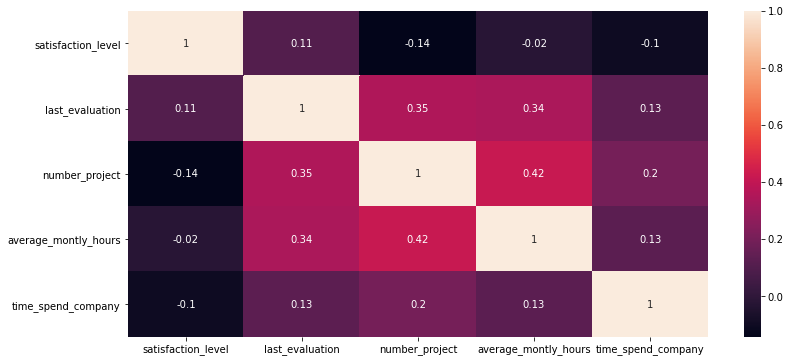

In [6]:
data_corr = data[data.columns[0:5]]
sns.heatmap(data_corr.corr(), annot = True)
#Наиболее скоррелированные - среднее количество часов и количество проетов
#Наименее скоррелированные - уровень удовлетворенности работой и стаж работы в компании

Задание №4 Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
data_group = pd.read_csv('HR.csv')
data_group.insert(0, 'number_of_employees', True) #Создаю пустой столбец
data_group['number_of_employees'] = 1 #Заполняю его
data_group_number = data_group.groupby('department').count()[['number_of_employees']] #Считаю количество строк в столбце
data_group_number

,number_of_employees
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


Задание №5 Показать распределение сотрудников по зарплатам.

In [8]:
data_group_salary = data_group.groupby('salary').count()[['number_of_employees']] #Считаю количество строк в столбце
data_group_salary

,number_of_employees
salary,
high,1237
low,7316
medium,6446


Задание №6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [9]:
data_group_salary_department = data_group.groupby(['department', 'salary']).count()[['number_of_employees']]
data_group_salary_department

number_of_employees
department  salary                     
IT          high                     83
            low                     609
            medium                  535
RandD       high                     51
            low                     364
            medium                  372
accounting  high                     74
            low                     358
            medium                  335
hr          high                     45
            low                     335
            medium                  359
management  high                    225
            low                     180
            medium                  225
marketing   high                     80
            low                     402
            medium                  376
product_mng high                     68
            low                     451
            medium                  383
sales       high                    269
            low                    2099
            medium                 1772
support     high                    141
            low                    1146
            medium                  942
technical   high                    201
            low                    1372
            medium                 1147

Задание №7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [10]:
data_group_salary_time = data.groupby('salary').mean()[['average_montly_hours']]
data_group_salary_time #Средее количество часов одинаково. Решение неочевидно. Нужно построить график

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


<AxesSubplot:title={'center':'High'}, ylabel='Frequency'>

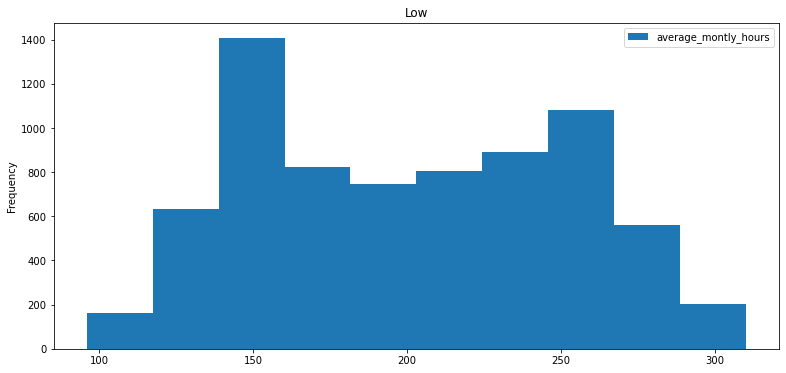

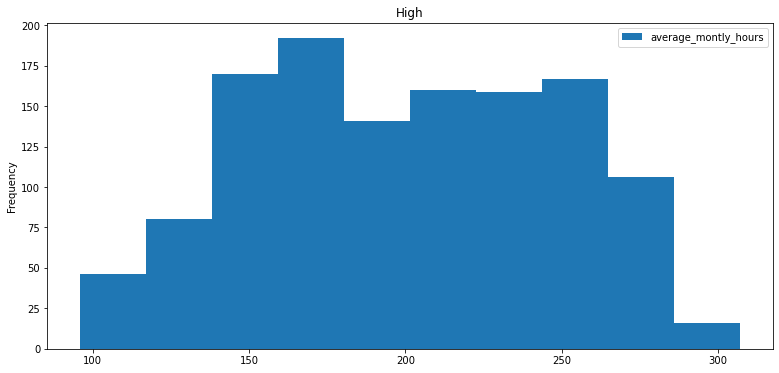

In [119]:
columns = ['average_montly_hours'] 
data_salary_low = data[data['salary'] == 'low'] #Выделяю две таблицы с зарплатами
data_salary_high = data[data['salary'] == 'high']
data_salary_low = pd.DataFrame(data_salary_low, columns=columns) #Оставляю в них только столбец со средничи часами работы
data_salary_high = pd.DataFrame(data_salary_high, columns=columns)
data_salary_low.plot(kind='hist', 
                   bins=10,
                   title='Low')
data_salary_high.plot(kind='hist', 
                   bins=10,
                   title='High')

In [12]:
#В среднем, люди с большей зарплатой работают больше, т.к график более равномерный

Задание №8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):\
Доля сотрудников с повышением за последние 5 лет\
Средняя степень удовлетворенности\
Среднее количество проектов


In [13]:
data_left = data_group[data_group['left'] == 1] #Создал отдельные таблицы с теми кто ушел и кто не ушел
data_dont_left = data_group[data_group['left'] == 0]
def left(left_data):
    a = left_data.groupby('promotion_last_5years').count()[['number_of_employees']].reset_index()
    proc = a.loc[1, 'number_of_employees'] / a.loc[0, 'number_of_employees']
    return print(round(proc, 4) * 100, '%')

In [14]:
left(data_left) #Количество тех, кто ушел и получал повышение за последние 5 лет

0.53 %


In [15]:
left(data_dont_left) #Количество тех, кто не ушел и получал повышение за последние 5 лет

2.7 %


In [16]:
data_group[data_group['left'] == 1]['satisfaction_level'].mean() #Средняя степень удовлетворения тех, кто ушел

0.44009801176140917

In [17]:
data_group[data_group['left'] == 0]['satisfaction_level'].mean() #Средняя степень удовлетворения тех, кто не ушел

0.666809590479516

In [18]:
data_group[data_group['left'] == 1]['number_project'].mean() #Среднее количество проектов тех, кто ушел

3.8555026603192384

In [19]:
data_group[data_group['left'] == 0]['number_project'].mean() #Среднее количество проектов тех, кто не ушел

3.786664333216661

Задание №9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, 
предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборке

In [100]:
data_class = data_new['left']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data_new, data_class, test_size=0.25)

In [102]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [103]:
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7576

In [105]:
y_test

14172    0
1756     1
7402     0
6381     0
2332     0
        ..
5224     0
14031    0
8056     0
4755     0
11339    0
Name: left, Length: 3750, dtype: int64

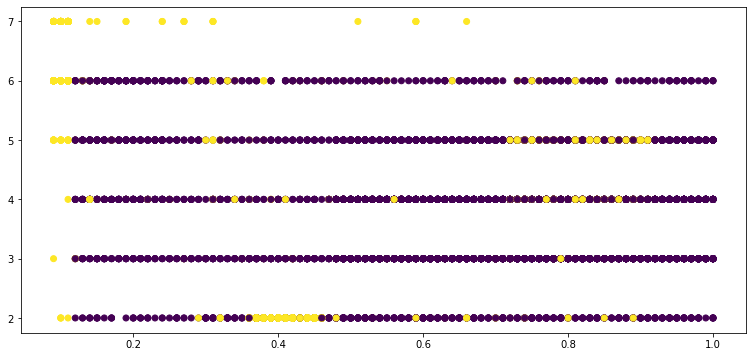

In [115]:
plt.scatter(X_train['satisfaction_level'], X_train['number_project'], c=y_train)
plt.show()
#Люди, у которых больше 6 проектов - уволились. Возможно, связано с высокой нагрузкой

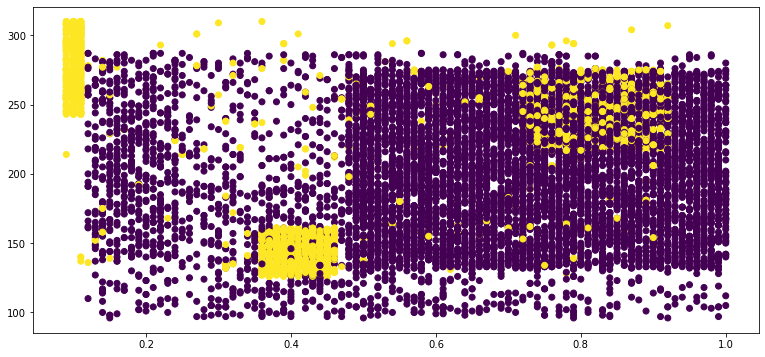

In [113]:
plt.scatter(X_train['satisfaction_level'], X_train['average_montly_hours'], c=y_train)
plt.show()
#Есть три группы уволившихся:
#1. Много часов и низкий уровень удовлетворенности. Логично
#2. Мало часов и средний уровень удовлетворенности. Возможно, не могли себя реализовать или было просто не интересно
#3. Много часов и высокий уровень удовлетворенности. Не понятно. Возможно, ушли на лучшие условия в другую контору 

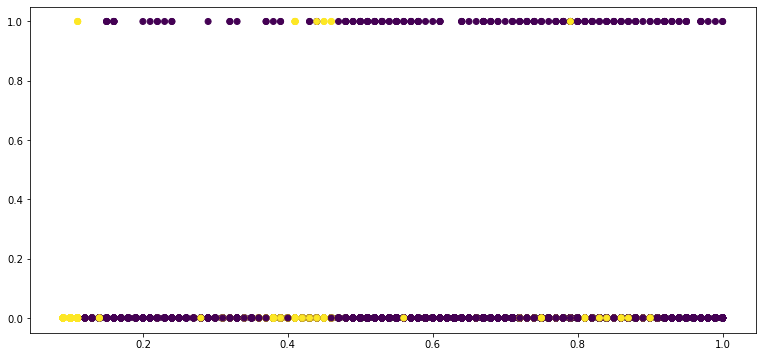

In [116]:
plt.scatter(X_train['satisfaction_level'], X_train['promotion_last_5years'], c=y_train)
plt.show()
#Уволившихся больше среди тех, кто не получил повышения

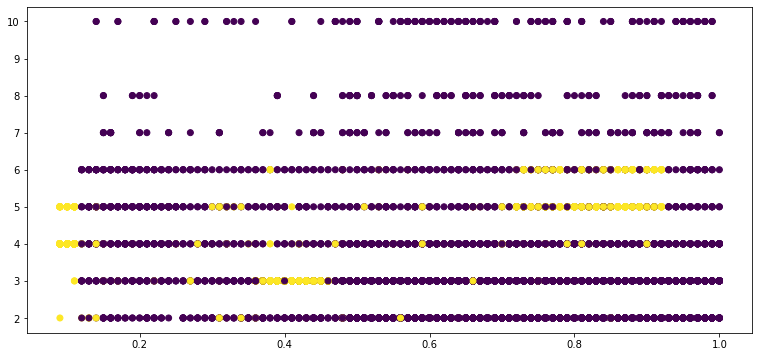

In [114]:
plt.scatter(X_train['satisfaction_level'], X_train['time_spend_company'], c=y_train)
plt.show()
#Больше всего уволившихся среди тех, кто проработал 5-6 лет